In [1]:
import pandas as pd 
import numpy as np
import tensorflow as tf
import scipy
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

#data Cleaning Libaries
# importing the libraries for cleaning the text
import re
import nltk
import spacy.cli
nltk.download('stopwords')
spacy.cli.download("en_core_web_lg")
import en_core_web_lg
nlp = en_core_web_lg.load()
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [2]:
from google.colab import files
uploaded = files.upload()

Saving Tweets.csv to Tweets.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Tweets.csv']))
print(df)
data = df.copy()


                 tweet_id airline_sentiment  airline_sentiment_confidence  \
0      570306133677760513           neutral                        1.0000   
1      570301130888122368          positive                        0.3486   
2      570301083672813571           neutral                        0.6837   
3      570301031407624196          negative                        1.0000   
4      570300817074462722          negative                        1.0000   
...                   ...               ...                           ...   
14635  569587686496825344          positive                        0.3487   
14636  569587371693355008          negative                        1.0000   
14637  569587242672398336           neutral                        1.0000   
14638  569587188687634433          negative                        1.0000   
14639  569587140490866689           neutral                        0.6771   

               negativereason  negativereason_confidence         airline  \

In [4]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [7]:
df['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [ ]:
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

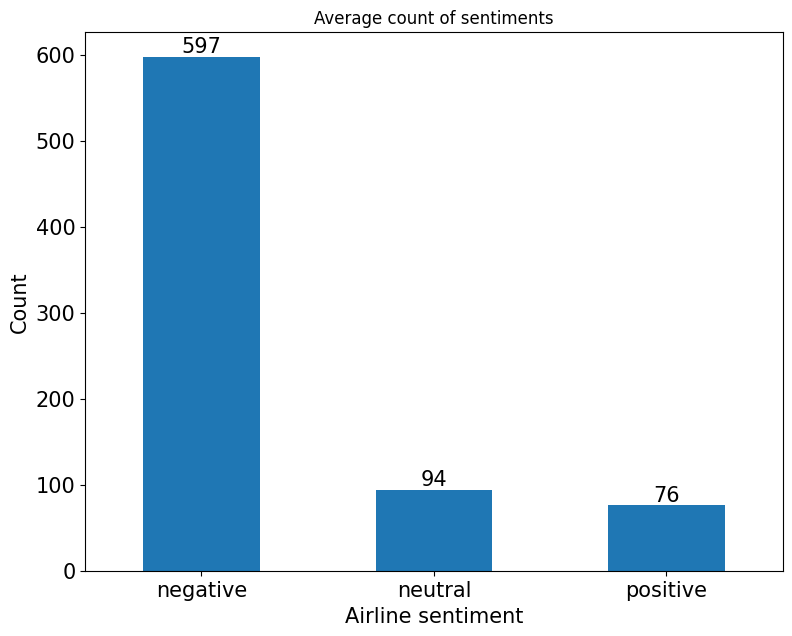

In [ ]:
fig, ax = plt.subplots(figsize =(9,7))
plot = df.groupby('airline_sentiment')['airline_sentiment'].count().plot(kind = 'bar',fontsize=15,)
plt.xlabel('Airline sentiment',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Average count of sentiments',fontsize=12)
plt.xticks(rotation=0)
for value in plot.patches:
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2.,
             1.002*height,'%d' % int(height), ha='center', va='bottom',fontsize=15)

Analysis by the Reason for the Negative Reviews

In [ ]:
round(df['negativereason'].value_counts(normalize=True)*100,2)

Customer Service Issue         31.71
Late Flight                    18.14
Can't Tell                     12.97
Cancelled Flight                9.23
Lost Luggage                    7.89
Bad Flight                      6.32
Flight Booking Problems         5.76
Flight Attendant Complaints     5.24
longlines                       1.94
Damaged Luggage                 0.81
Name: negativereason, dtype: float64

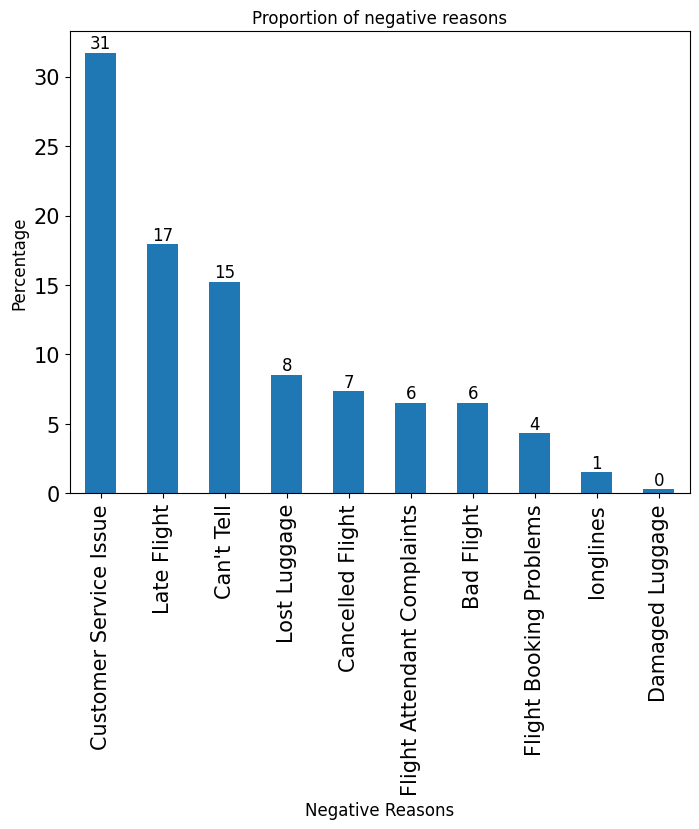

In [ ]:
fig, ax = plt.subplots(figsize =(8,6))
plot = round(df['negativereason'].value_counts(normalize=True)*100,2).plot(kind = 'bar',fontsize=15,)
plt.xlabel('Negative Reasons',fontsize=12)
plt.ylabel('Percentage',fontsize=12)
plt.title('Proportion of negative reasons',fontsize=12)
for value in plot.patches:
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2.,
             1.002*height,'%d' % int(height), ha='center', va='bottom',fontsize=12)

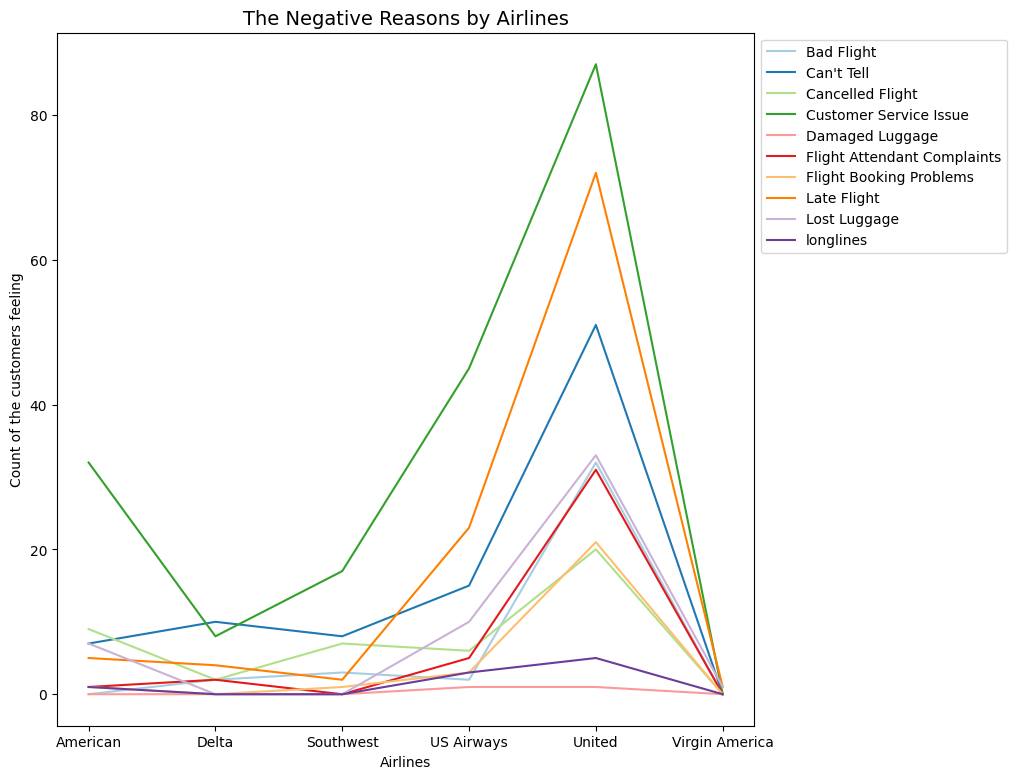

In [ ]:
pd.crosstab(df.airline, df.negativereason).plot(color=sns.color_palette("Paired"),figsize=(9,9))
plt.title('The Negative Reasons by Airlines', fontsize=14)
plt.xlabel('Airlines')
plt.ylabel('Count of the customers feeling')
plt.legend(bbox_to_anchor=(1, 1), loc=2)

**Insights:**

1."customer service issue" has been major (Top most) problem for all the airlines except delta.

2.All the airlines negative reasons follow the same pattern as seen in the previous graph. Henceforth, the airlines needs to look into the major reason like "customer service issue", "late flight" to improve their standards

In [ ]:
len(df['airline'].unique())

6

In [ ]:
df['airline'].unique()

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

In [ ]:
df.groupby(['airline','airline_sentiment'])['airline_sentiment'].count()

airline         airline_sentiment
American        negative             1960
                neutral               463
                positive              336
Delta           negative              955
                neutral               723
                positive              544
Southwest       negative             1186
                neutral               664
                positive              570
US Airways      negative             2263
                neutral               381
                positive              269
United          negative             2633
                neutral               697
                positive              492
Virgin America  negative              181
                neutral               171
                positive              152
Name: airline_sentiment, dtype: int64

In [ ]:
df.groupby(['airline','airline_sentiment'])['airline_sentiment'].count().idxmax()

('United', 'negative')

In [ ]:
df.groupby(['airline','airline_sentiment'])['airline'].count().max()

2633

In [ ]:
round(df['negativereason'].value_counts(normalize=True)*100,2).max()

31.71

In [ ]:
df['date'] = df['tweet_created'].apply(lambda x: x.split(' ')[0])
df['time'] = df['tweet_created'].apply(lambda x: x.split(' ')[1] + ' ' + x.split(' ')[2])

In [ ]:
df.groupby(['date','airline_sentiment'])['airline_sentiment'].count()

date        airline_sentiment
2015-02-16  negative                3
            neutral                 1
2015-02-17  negative              838
            neutral               297
            positive              273
2015-02-18  negative              736
            neutral               335
            positive              273
2015-02-19  negative              751
            neutral               329
            positive              296
2015-02-20  negative              835
            neutral               383
            positive              282
2015-02-21  negative             1049
            neutral               278
            positive              230
2015-02-22  negative             2266
            neutral               463
            positive              350
2015-02-23  negative             1919
            neutral               676
            positive              433
2015-02-24  negative              781
            neutral               337
            positive

In [ ]:
df.groupby(['airline','airline_sentiment'])['airline_sentiment'].count()

airline         airline_sentiment
American        negative             1960
                neutral               463
                positive              336
Delta           negative              955
                neutral               723
                positive              544
Southwest       negative             1186
                neutral               664
                positive              570
US Airways      negative             2263
                neutral               381
                positive              269
United          negative             2633
                neutral               697
                positive              492
Virgin America  negative              181
                neutral               171
                positive              152
Name: airline_sentiment, dtype: int64

### **Analysis by the Retweet count**
This analysis is performed because, there may be tweets which other people wouldn't have expressed but wants to express to some others review. This is considered an important aspect because all the retweets are again considered as a new tweet by a different individual

In [ ]:
value_counts = df['retweet_count'].value_counts()
#First, removing all the rows which has a retweet count of 0, because it doesn't add any value.
to_remove = value_counts[value_counts.index == 0].index  
df = df[~df.retweet_count.isin(to_remove)]

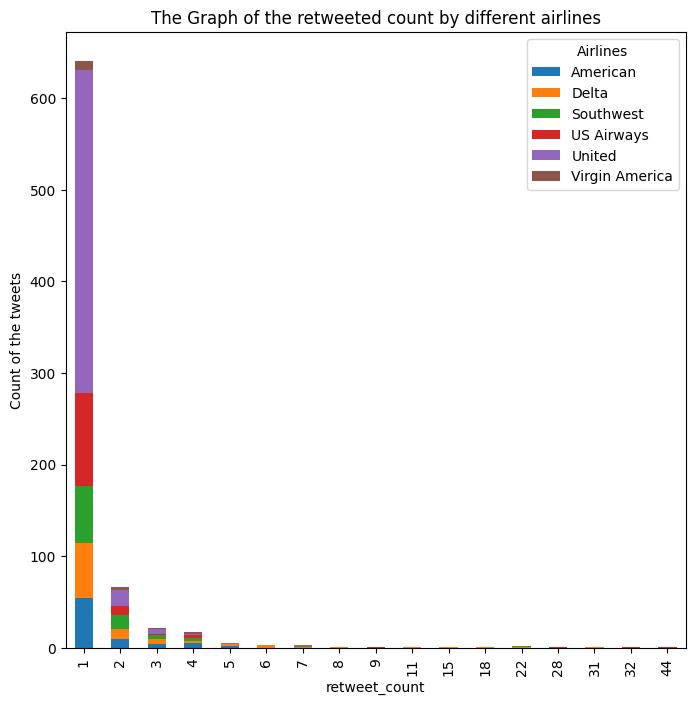

In [ ]:
ct = pd.crosstab(df.retweet_count, df.airline)
ct.plot.bar(stacked=True, figsize = (8,8))
plt.ylabel("Count of the tweets")
plt.title("The Graph of the retweeted count by different airlines")
plt.legend(title='Airlines')
plt.show()

Analysis by the Reason for the Negative Reviews

In [ ]:
df.corr()

<ipython-input-30-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
tweet_id,1.000000,0.024840,0.021533,-0.008852
airline_sentiment_confidence,0.024840,1.000000,0.685879,0.012581
negativereason_confidence,0.021533,0.685879,1.000000,0.021574
retweet_count,-0.008852,0.012581,0.021574,1.000000


In [ ]:
df['timestamp'] = pd.to_datetime(df['tweet_created'])

In [ ]:
df['timestamp_dayofweek']=df['timestamp'].dt.weekday

In [ ]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,date,time,timestamp,timestamp_dayofweek
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),2015-02-24,11:35:52 -0800,2015-02-24 11:35:52-08:00,1
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),2015-02-24,11:15:59 -0800,2015-02-24 11:15:59-08:00,1
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),2015-02-24,11:15:48 -0800,2015-02-24 11:15:48-08:00,1
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),2015-02-24,11:15:36 -0800,2015-02-24 11:15:36-08:00,1
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),2015-02-24,11:14:45 -0800,2015-02-24 11:14:45-08:00,1


In [ ]:
import datetime
def extract_hour_minute(time_str):
    time_parts = time_str.split(' ')
    time = time_parts[0]
    dt = datetime.datetime.strptime(time, "%H:%M:%S")
    hour = dt.hour
    minute = dt.minute
    return f"{hour:02d}:{minute:02d}"

# apply function to 'time' column and create new 'hour_minute' column
df['time'] = df['time'].apply(extract_hour_minute)

In [ ]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
df['time'] = pd.to_numeric(df['time'].str.split(':').str[0])
df['time'] = pd.cut(df['time'], bins=range(0, 25), include_lowest=True, labels=range(0, 24))


In [ ]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone', 'date', 'time', 'timestamp',
       'timestamp_dayofweek', 'hour_minute', 'hour'],
      dtype='object')

In [ ]:
df.drop(['tweet_id','airline_sentiment_gold','name','negativereason_gold','text','tweet_coord',
         'tweet_created','tweet_location','timestamp','date'],axis=1,inplace=True)

In [ ]:
df['airline_sentiment'] = df['airline_sentiment'].replace({'positive':1,'neutral':2,'negative':3})

In [ ]:
df['negativereason'].fillna('None',inplace=True)

In [ ]:
le =LabelEncoder()

In [ ]:
df['negativereason'] = le.fit_transform(df['negativereason'])

In [ ]:
df.groupby(['airline_sentiment'])['negativereason_confidence'].sum()

airline_sentiment
1       0.0000
2       0.0000
3    6716.1745
Name: negativereason_confidence, dtype: float64

In [ ]:
df['negativereason_confidence'].fillna('0.0000',inplace=True)

In [ ]:
df['airline'] = le.fit_transform(df['airline'])

In [ ]:
df['user_timezone'] = le.fit_transform(df['user_timezone'])

In [ ]:
df.columns

Index(['airline_sentiment', 'airline_sentiment_confidence', 'negativereason',
       'negativereason_confidence', 'airline', 'retweet_count',
       'user_timezone', 'time', 'timestamp_dayofweek', 'hour_minute', 'hour'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   airline_sentiment             14640 non-null  int64   
 1   airline_sentiment_confidence  14640 non-null  float64 
 2   negativereason                14640 non-null  int64   
 3   negativereason_confidence     14640 non-null  object  
 4   airline                       14640 non-null  int64   
 5   retweet_count                 14640 non-null  int64   
 6   user_timezone                 14640 non-null  int64   
 7   time                          14640 non-null  category
 8   timestamp_dayofweek           14640 non-null  int64   
 9   hour_minute                   14640 non-null  object  
 10  hour                          14640 non-null  int64   
dtypes: category(1), float64(1), int64(7), object(2)
memory usage: 1.1+ MB


In [ ]:
df['negativereason_confidence']=pd.to_numeric(df['negativereason_confidence'])

In [ ]:
df['time']=pd.to_numeric(df['time'])

<ipython-input-72-6fae0fa5f5dc>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

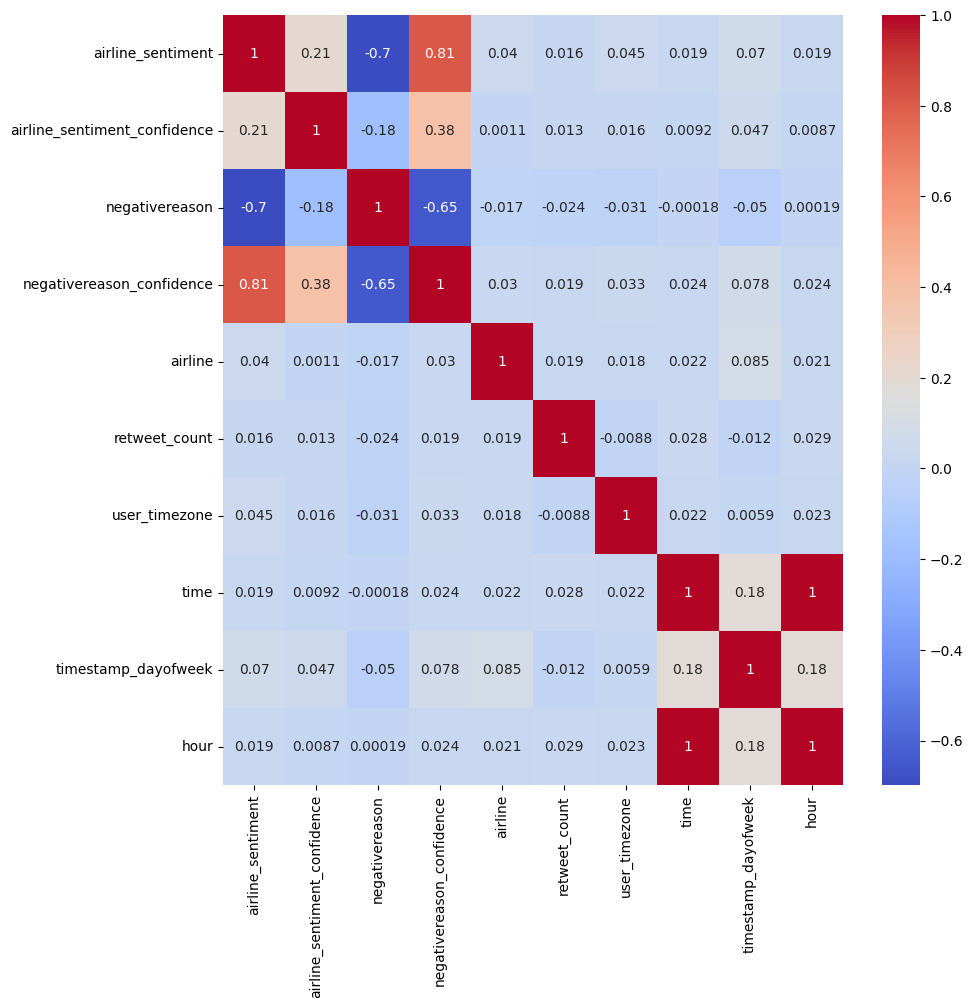

In [ ]:
corr = df.corr()
plt.subplots(figsize = (10,10))
sns.heatmap(corr,annot=True, cmap='coolwarm')

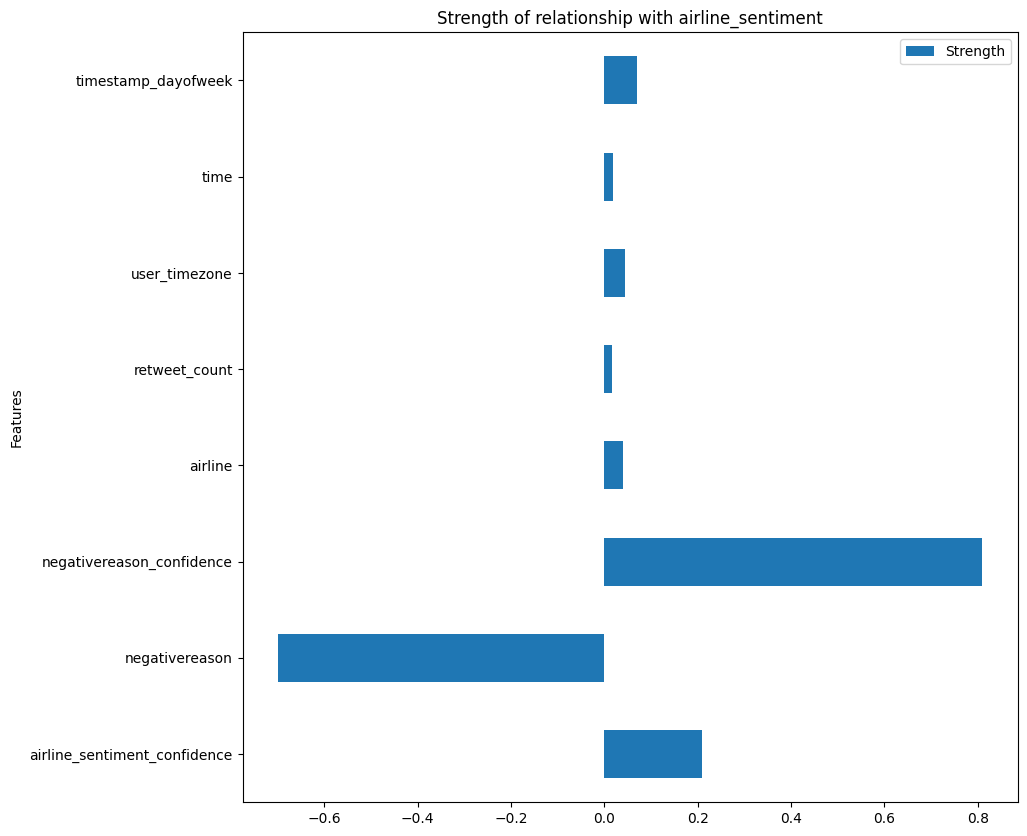

In [ ]:
rel = {"Features": ['airline_sentiment_confidence', 'negativereason','negativereason_confidence',
                    'airline','retweet_count','user_timezone', 'time', 'timestamp_dayofweek'],
       "Strength":[0.21,-0.7,0.81,0.04,0.016,0.045,0.019,0.07]}
dataFrame  = pd.DataFrame(data = rel)
dataFrame.plot.barh(x='Features', y='Strength', title="Strength of relationship with airline_sentiment",figsize = (10,10))
plt.show(block=True)

**Important columns:**
1. airline_sentiment
2. negativereason
3. text

### Data Preprocessing

In [ ]:
data

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [ ]:
reviews = np.array(data['text'])[:14000]
labels = np.array(data['airline_sentiment'])[:14000]

In [ ]:
data['airline_sentiment'].loc[14639]

'neutral'

In [ ]:
data['text'].loc[14639]

'@AmericanAir we have 8 ppl so we need 2 know how many seats are on the next flight. Plz put us on standby for 4 people on the next flight?'

In [ ]:
reviews

array(['@VirginAmerica What @dhepburn said.',
       "@VirginAmerica plus you've added commercials to the experience... tacky.",
       "@VirginAmerica I didn't today... Must mean I need to take another trip!",
       ...,
       '@AmericanAir you set a schedule try and keep it !!! #AAALWAYSLate Flight',
       "@AmericanAir @derekc21 , to my surprise  BA doesn't  have  me registered in the system , I was getting hopeful :(, Lets step it up , Okay ?",
       '@AmericanAir Unfortunately that is not true. A robot apologizes and hangs up. So how do I get help?'],
      dtype=object)

In [ ]:
data

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [ ]:
from collections import Counter

Counter(labels)

Counter({'neutral': 3017, 'positive': 2304, 'negative': 8679})

In [ ]:
from nltk.tokenize import TweetTokenizer
nltk.download('wordnet')

data['text'] = data['text'].apply(lambda x: re.sub(r'http\S+', '', x))  # remove URLs
data['text'] = data['text'].apply(lambda x: re.sub(r'@\w+', '', x))  # remove user mentions
data['text'] = data['text'].apply(lambda x: re.sub(r'#\w+', '', x))  # remove hashtags

# remove punctuation and convert to lowercase
data['text'] = data['text'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))  # remove punctuation
data['text'] = data['text'].str.lower()  # convert to lowercase

# tokenize text using NLTK TweetTokenizer
tokenizer = TweetTokenizer()
data['tokens'] = data['text'].apply(tokenizer.tokenize)

# remove stop words
stop_words = set(stopwords.words('english'))
data['tokens'] = data['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

# lemmatize tokens using NLTK WordNetLemmatizer
wnl = nltk.WordNetLemmatizer()
data['tokens'] = data['tokens'].apply(lambda x: [wnl.lemmatize(word) for word in x])

# join tokens back into text
data['text'] = data['tokens'].apply(lambda x: ' '.join(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
data['text'][21]

'love graphic'

In [ ]:
df = d[['clean_text','airline_sentiment']]

In [ ]:
data

,clean_text,airline_sentiment
0,virginamerica dhepburn said,neutral
1,virginamerica plus added commercials experienc...,positive
2,virginamerica today must mean need take anothe...,neutral
3,virginamerica really aggressive blast obnoxiou...,negative
4,virginamerica really big bad thing,negative
...,...,...
14635,americanair thank got different flight chicago,positive
14636,americanair leaving minutes late flight warnin...,negative
14637,americanair please bring american airlines bla...,neutral
14638,americanair money change flight answer phones ...,negative
